<a href="https://colab.research.google.com/github/codeson101001/Stock-Prediction-Models/blob/master/Stock_Scalping_Strategy_Over_and_Under_MA_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
#Dual moving avg moving crossover
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Install yfinance package.
!pip install yfinance

# Import yfinance
import yfinance as yf  

#Stock that I want looked at
#tickers list or string as well
#valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
#valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
data = yf.download("AMZN", start="2018-01-01", end="2018-12-28")




# Get the data for the stock Apple by specifying the stock ticker, start date, and end date
#data = yf.download("VZ","2018-07-28","2019-08-28")

#This gets minute level data


# Plot the close prices
import matplotlib.pyplot as plt
#data.Close.plot()
#############plt.show()
#Produces data from begining to end for rows
#Produces colums with open, high, low, close, adj close, volume
stockData=data
#stockData

[*********************100%***********************]  1 of 1 completed


In [37]:
#Fast MA Signal
fastSignal = pd.DataFrame()
fastSignal['Close'] = stockData['Close'].rolling(window=9).mean()

In [38]:
#Create a new data framw to store all the data
data=pd.DataFrame()
data['stock'] = stockData['Close']
data['fastSignal'] = fastSignal['Close']
data.tail()

,stock,fastSignal
Date,,
2018-12-20,1460.829956,1580.711114
2018-12-21,1377.449951,1551.424438
2018-12-24,1343.959961,1518.171102
2018-12-26,1470.900024,1496.766656
2018-12-27,1461.640015,1474.906657


In [39]:
#Create a function to signal when to buy and sell the stock
def buy_sell(data):

  #This are python lists that will be added to as the for loop runs
  sigPriceBuy = []
  sigPriceSell = []
  

  wasStockBought = False

  #This loop will go through my entire data set
  for i in range(len(data)):


    #Where the stock is currently
    #currentPrice = (data['stock'][i])
    #currentPrice = currentPrice.astype(float)
    #if currentPrice > 1:
      #print("asdf")


    #If the fast MA is over the slow MA
    if data['fastSignal'][i] >= data['stock'][i]:
      if wasStockBought != False:
        sigPriceBuy.append(data['stock'][i])
        sigPriceSell.append(np.nan)
        wasStockBought = False

      #If nothing move one to next stock price point  
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)

    #If the slow MA is over the fast MA
    elif data['fastSignal'][i] <= data['stock'][i]:
      if wasStockBought != True:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(data['stock'][i])
        wasStockBought = True

      #If nothing move one to next stock price point  
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)

    #If nothing move one to next stock price point  
    else:
      sigPriceBuy.append(np.nan)
      sigPriceSell.append(np.nan)

  return(sigPriceBuy,sigPriceSell)


In [40]:
#Store the buy and sell data into a variable that we made earilir
#All the data manipulaation that was done is done here in this set
buy_sell = buy_sell(data)
data['Buy_Signal_Price'] = buy_sell[True]
data['Sell_Signal_Price'] = buy_sell[False]
data.head()

,stock,fastSignal,Buy_Signal_Price,Sell_Signal_Price
Date,,,,
2018-01-02,1189.010010,NaN,NaN,NaN
2018-01-03,1204.199951,NaN,NaN,NaN
2018-01-04,1209.589966,NaN,NaN,NaN
2018-01-05,1229.140015,NaN,NaN,NaN
2018-01-08,1246.869995,NaN,NaN,NaN


In [41]:
pd.set_option('display.max_rows', data.shape[0]+1)
data

,stock,fastSignal,Buy_Signal_Price,Sell_Signal_Price
Date,,,,
2018-01-02,1189.010010,NaN,NaN,NaN
2018-01-03,1204.199951,NaN,NaN,NaN
2018-01-04,1209.589966,NaN,NaN,NaN
2018-01-05,1229.140015,NaN,NaN,NaN
2018-01-08,1246.869995,NaN,NaN,NaN
2018-01-09,1252.699951,NaN,NaN,NaN
2018-01-10,1254.329956,NaN,NaN,NaN
2018-01-11,1276.680054,NaN,NaN,NaN
2018-01-12,1305.199951,1240.857761,1305.199951,NaN


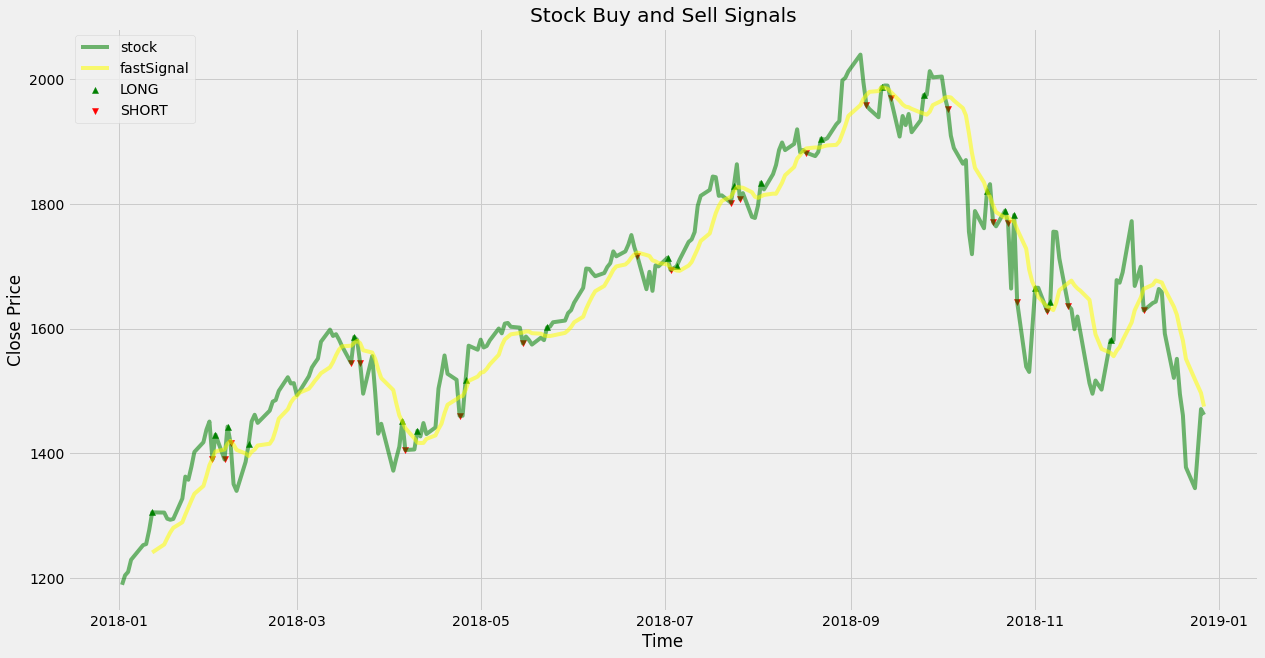

In [42]:
#Vizulaize data and stratigy to buy and sell stock
plt.figure(figsize=(19,10))

plt.plot(data['stock'],label = 'stock', alpha = 0.55,color ='green')
plt.plot(data['fastSignal'],label = 'fastSignal', alpha = 0.55,color ='yellow')

plt.scatter(data.index, data['Buy_Signal_Price'], label = 'LONG', marker='^', color='green')
plt.scatter(data.index, data['Sell_Signal_Price'], label = 'SHORT', marker='v', color='red')
plt.title('Stock Buy and Sell Signals')

plt.xlabel('Time')
plt.ylabel('Close Price')

plt.legend(loc='upper left')
plt.show()

